<a href="https://colab.research.google.com/github/raneemYalsaedi922/oral-cancer-classification/blob/main/MM_DFF_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.6 MB/s eta 0:00:00


In [2]:
#!pip uninstall numpy imgaug -y
!pip install numpy==1.26.4 imgaug --force-reinstall #--no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.4 MB/s eta 0:00:00
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached shapely-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 5.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.5 MB/s eta 0:00:00
Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wget
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9685 sha256=f6743e5f289fb6b046fa53ca84b825e922790aabbfa2e38263b4ff4ffa13fcc4
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [4]:
!pip install torchvision

In [5]:
! pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.2 MB/s eta 0:00:00


In [6]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.7 MB/s eta 0:00:00


In [7]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.0 MB/s eta 0:00:00


In [8]:
import gdown
#download test data

file_from = 'https://download1351.mediafire.com/akutqkn7zibgzKZ7pWNvWCaVHQWZewVNT7ZHTbiKsl420hY37HuADVM6uj0qBRxLc0289gnrXKK0ndKF8Rc19Kvp4w8krvrdpAMOF7vcKi9Pc41H7kJ84Fk7IIUMNhrmZO2Za3b0XkD-sM8LXm8pdCN5UEnx8djSn_1dn2I3XS3pTQ/bkc7yq92ruma9jw/test_images.zip'
file_to = '/content/test.zip'

gdown.download(file_from, file_to)


Downloading...
From: https://download1351.mediafire.com/akutqkn7zibgzKZ7pWNvWCaVHQWZewVNT7ZHTbiKsl420hY37HuADVM6uj0qBRxLc0289gnrXKK0ndKF8Rc19Kvp4w8krvrdpAMOF7vcKi9Pc41H7kJ84Fk7IIUMNhrmZO2Za3b0XkD-sM8LXm8pdCN5UEnx8djSn_1dn2I3XS3pTQ/bkc7yq92ruma9jw/test_images.zip
To: /content/test.zip
100%|██████████| 289M/289M [00:02<00:00, 138MB/s]


'/content/test.zip'

In [9]:
!unzip /content/test.zip -d test_folder/

Archive:  /content/test.zip
   creating: test_folder/test_images/
   creating: test_folder/test_images/leukoplakia_without_dysplasia/
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0022.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0070.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0086.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0092.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0095.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0097.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0142.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0184.png  
  inflating: test_folder/test_images/leukoplakia_without_dysplasia/0200.png  
   creating: test_folder/test_images/leukoplakia_with_dysplasia/
  inflating: test_folder/test_images/leukoplakia_with_dysplasia/0015.png  
  inflating: test_folder

In [10]:
import gdown
#download train data
file_from = 'https://download1530.mediafire.com/f42d3jdzac7gQOqBZv83WYxDz1JDZrh46sE4RjEqTW5HoGcC-xXMBDwBw03C2qSVWPuQ0SyW1vKjEZ8u61RKWqjuSqPXSHppUSS4oKMXWXJmwMaXokyP2lI2NqtxSnMLOggTj-w_-6l6WRzBzIbzm4ZUp7StcCmtSTOsbN16wtXnig/171r2m1ce49uzca/train_images.zip'
file_to = '/content/train.zip'

gdown.download(file_from, file_to)

Downloading...
From: https://download1530.mediafire.com/f42d3jdzac7gQOqBZv83WYxDz1JDZrh46sE4RjEqTW5HoGcC-xXMBDwBw03C2qSVWPuQ0SyW1vKjEZ8u61RKWqjuSqPXSHppUSS4oKMXWXJmwMaXokyP2lI2NqtxSnMLOggTj-w_-6l6WRzBzIbzm4ZUp7StcCmtSTOsbN16wtXnig/171r2m1ce49uzca/train_images.zip
To: /content/train.zip
100%|██████████| 1.45G/1.45G [00:21<00:00, 68.9MB/s]


'/content/train.zip'

In [11]:
!unzip /content/train.zip -d train_folder/

Archive:  /content/train.zip
   creating: train_folder/train_images/
   creating: train_folder/train_images/leukoplakia_without_dysplasia/
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0023.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0024.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0025.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0026.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0027.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0046.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0047.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0068.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0069.png  
  inflating: train_folder/train_images/leukoplakia_without_dysplasia/0071.png  
  inflating: train_folder/train_images/leukoplakia_without_dy

CSV File

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file
csv_path = '/content/drive/MyDrive/train_csv.csv'
csv_data = pd.read_csv(csv_path)
# Assuming the CSV has columns for image paths, features, and labels
# Extract features, image paths, and labels
csv_features = csv_data.drop(columns=['path', 'label'])  # Drop columns that are not features
image_paths = csv_data['path']  # Assuming this column contains image paths
labels = csv_data['label']  # Assuming this column contains labels

cvs_test = '/content/drive/MyDrive/test_csv.csv'
csv_data_test = pd.read_csv(cvs_test)
# Assuming the CSV has columns for image paths, features, and labels
# Extract features, image paths, and labels
csv_features_test = csv_data_test.drop(columns=['path', 'label'])  # Drop columns that are not features
image_paths = csv_data_test['path']  # Assuming this column contains image paths
labels_test = csv_data_test['label']  # Assuming this column contains labels


# Standardize the features
scaler = StandardScaler()
csv_features = scaler.fit_transform(csv_features)

csv_features_test = scaler.fit_transform(csv_features_test)

# Create a dictionary to map image paths to their corresponding features and labels
csv_features_dict = {row['path']: (csv_features[i], labels[i]) for i, row in csv_data.iterrows()}

# test
csv_features_dict_test = {row['path']: (csv_features_test[i], labels_test[i]) for i, row in csv_data_test.iterrows()}

Augmentation with CSV file

In [13]:
import pandas as pd
import torch
from torchvision.datasets import ImageFolder
from sklearn.preprocessing import StandardScaler

class AugmentedImageFolderWithCSV(ImageFolder):
    def __init__(self, root, csv_path, transform=None):
        super(AugmentedImageFolderWithCSV, self).__init__(root, transform)

        # Load CSV data
        self.csv_data = pd.read_csv(csv_path)

        # Standardize the features in the CSV
        csv_features = self.csv_data.drop(columns=['path', 'label'])
        scaler = StandardScaler()
        csv_features = scaler.fit_transform(csv_features)

        # Create a dictionary to map image filenames to their corresponding features and labels
        self.csv_features_dict = {row['path']: (csv_features[i], self.csv_data['label'][i]) for i, row in self.csv_data.iterrows()}

    def __getitem__(self, index):
        # Get the image and its label as usual
        path, _ = self.samples[index]
        image = self.loader(path)
        if self.transform is not None:
            image = self.transform(image)

        # Extract the filename from the path
        image_filename = path.split('/')[-1]

        # Retrieve the corresponding CSV features and label
        csv_features, label = self.csv_features_dict[image_filename]

        # Convert CSV features to tensor
        csv_features = torch.tensor(csv_features, dtype=torch.float32)

        return image, csv_features, label


In [14]:
# use for train_dataset
from imgaug import augmenters as iaa
import torchvision
import numpy as np
#from RandStainNA.randstainna import RandStainNA
from PIL import Image

# use for train_dataset
class ImgTrainTransform:

    def __init__(self, size=(224, 224), normalization=([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])):
        self.normalization = normalization

        self.aug = iaa.Sequential([
            iaa.Sometimes(0.25, iaa.Affine(scale={"x": (1.0, 2.0), "y": (1.0, 2.0)})),
            iaa.Scale(size),
            iaa.Fliplr(0.5),
            iaa.Flipud(0.2),
            iaa.Sometimes(0.25, iaa.Affine(rotate=(-120, 120), mode='symmetric')),
            iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
            iaa.Sometimes(0.1,
                          iaa.OneOf([
                              iaa.Dropout(p=(0, 0.05)),
                              iaa.CoarseDropout(0.02, size_percent=0.25)
                          ])),
            iaa.Sometimes(0.25,
                          iaa.OneOf([
                              iaa.Add((-15, 15), per_channel=0.5),  # brightness
                              iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
                          ])),

        ])

    def __call__(self, img):
        img = self.aug.augment_image(np.array(img)).copy()
        # Convert to tensor and normalize
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(self.normalization[0], self.normalization[1]),
        ])
        return transforms(img)

# use for test_dataset
class ImgEvalTransform:

    def __init__(self, size=(224, 224), normalization=([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])):
        self.normalization = normalization
        self.size = size

    def __call__(self, img):
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.Resize(self.size),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(self.normalization[0], self.normalization[1]),
        ])
        return transforms(img)

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
##
train_transform = ImgTrainTransform()
eval_transform = ImgEvalTransform()

/usr/local/lib/python3.11/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  warn_deprecated(msg, stacklevel=3)


In [16]:
# Define paths to the dataset and the CSV file
train_image_root = '/content/train_folder/train_images'
test_image_root = '/content/test_folder/test_images'
csv_path = '/content/drive/MyDrive/train_csv.csv'
csv_path_test = '/content/drive/MyDrive/test_csv.csv'

# Instantiate the datasets
trainset = AugmentedImageFolderWithCSV(root=train_image_root, csv_path=csv_path, transform=train_transform)
testset = AugmentedImageFolderWithCSV(root=test_image_root, csv_path=csv_path_test, transform=eval_transform)

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from imblearn.metrics import specificity_score , sensitivity_score
from torch.nn import functional as F
import torchvision.models as models
import torchvision
#%matplotlib inline
import os
import random

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

Random Seed:  999


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skmet
from scipy.stats import norm
from math import sqrt


def _check_dim(lab_real, lab_pred, mode='scores'):
    """
    Ensures lab_real and lab_pred are in correct shape. Converts to one-hot if necessary.
    """
    if mode == 'scores':
        if lab_real.ndim == 1:
            lab_real = skmet.label_binarize(lab_real, classes=np.unique(lab_real))
        if lab_pred.ndim == 1:
            lab_pred = skmet.label_binarize(lab_pred, classes=np.unique(lab_pred))
    return lab_real, lab_pred


def compute_auc_ci(auc, y_true, y_score, alpha=0.95):
    """
    Computes SE and 95% CI for an AUC using Hanley & McNeil method.
    """
    n1 = sum(y_true)               # Positive samples
    n2 = len(y_true) - n1          # Negative samples

    if n1 == 0 or n2 == 0:
        return auc, None, (None, None)  # Cannot compute CI without both classes

    q1 = auc / (2 - auc)
    q2 = 2 * auc**2 / (1 + auc)
    se = sqrt((auc*(1 - auc) + (n1 - 1)*(q1 - auc**2) + (n2 - 1)*(q2 - auc**2)) / (n1 * n2))

    z = norm.ppf(1 - (1 - alpha) / 2)
    lower = auc - z * se
    upper = auc + z * se
    return auc, se, (max(0, lower), min(1, upper))


def auc_and_roc_curve(lab_real, lab_pred, class_names, class_to_compute='all', save_path=None):
    """
    Computes ROC, AUC, SE and 95% CI for each class (or all).
    Returns: dicts with AUCs, FPR, TPR, and statistics (SE & CI).
    """
    lab_real, lab_pred = _check_dim(lab_real, lab_pred, mode='scores')

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_stats = dict()

    for i, name in enumerate(class_names):
        fpr[name], tpr[name], _ = skmet.roc_curve(lab_real[:, i], lab_pred[:, i])
        roc_auc[name] = skmet.auc(fpr[name], tpr[name])
        auc_val, se_val, ci_val = compute_auc_ci(roc_auc[name], lab_real[:, i], lab_pred[:, i])
        auc_stats[name] = {"auc": auc_val, "se": se_val, "ci_95": ci_val}

    if class_to_compute == 'all':
        # Macro AUC
        all_fpr = np.unique(np.concatenate([fpr[name] for name in class_names]))
        mean_tpr = np.zeros_like(all_fpr)
        for name in class_names:
            mean_tpr += np.interp(all_fpr, fpr[name], tpr[name])
        mean_tpr /= float(len(class_names))
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = skmet.auc(fpr["macro"], tpr["macro"])
        auc_val, se_val, ci_val = compute_auc_ci(roc_auc["macro"], lab_real.ravel(), lab_pred.ravel())
        auc_stats["macro"] = {"auc": auc_val, "se": se_val, "ci_95": ci_val}

        # Micro AUC
        fpr["micro"], tpr["micro"], _ = skmet.roc_curve(lab_real.ravel(), lab_pred.ravel())
        roc_auc["micro"] = skmet.auc(fpr["micro"], tpr["micro"])
        auc_val, se_val, ci_val = compute_auc_ci(roc_auc["micro"], lab_real.ravel(), lab_pred.ravel())
        auc_stats["micro"] = {"auc": auc_val, "se": se_val, "ci_95": ci_val}

        if save_path:
            plt.figure()

            plt.plot(fpr["micro"], tpr["micro"],
                     label='MicroAVG - AUC: {0:0.2f}'.format(roc_auc["micro"]),
                     color='deeppink', linestyle=':', linewidth=2)

            plt.plot(fpr["macro"], tpr["macro"],
                     label='MacroAVG - AUC: {0:0.2f}'.format(roc_auc["macro"]),
                     color='navy', linestyle=':', linewidth=2)

            for name in class_names:
                plt.plot(fpr[name], tpr[name], linewidth=1,
                         label='{0} - AUC: {1:0.2f}'.format(name, roc_auc[name]))

    else:
        if save_path:
            plt.plot(fpr[class_to_compute], tpr[class_to_compute], linewidth=1,
                     label='{0} - AUC: {1:0.2f}'.format(class_to_compute, roc_auc[class_to_compute]))

    if save_path:
        plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curves')
        plt.legend(loc="lower right")

        if isinstance(save_path, str):
            plt.savefig(save_path)
            plt.clf()
        elif save_path:
            plt.show()

    return roc_auc, fpr, tpr, auc_stats


In [19]:
# Define hyperparameters
num_epochs = 10
learning_rate = 0.001
num_classes = 3

combined lbp and wavelet concatenate

In [20]:
import torch
import torch.nn as nn
import numpy as np
import pywt

# LBP Features Class
class LBPFeatures(nn.Module):
    def __init__(self, radius, num_points, img_size):
        super(LBPFeatures, self).__init__()
        self.radius = radius
        self.num_points = num_points
        self.img_size = img_size

    def forward(self, x):
        if x.size(1) == 3:
            x_gray = torch.mean(x, dim=1, keepdim=True)
        else:
            x_gray = x.clone()

        features = []
        for i in range(x.size(0)):
            img = x_gray[i].squeeze().cpu().numpy()
            lbp = self._compute_lbp(img)
            hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, self.num_points + 3), range=(0, self.num_points + 2))
            features.append(hist)

        features = torch.tensor(features, dtype=torch.float32)
        return features

    def _compute_lbp(self, img):
        lbp = np.zeros_like(img)
        for i in range(self.radius, img.shape[0] - self.radius):
            for j in range(self.radius, img.shape[1] - self.radius):
                center = img[i, j]
                code = 0
                for k in range(self.num_points):
                    angle = 2 * np.pi * k / self.num_points
                    x = i + int(self.radius * np.cos(angle))
                    y = j - int(self.radius * np.sin(angle))
                    if img[x, y] >= center:
                        code |= 1 << k
                lbp[i, j] = code
        return lbp

# Wavelet Features Class
class WaveletFeatures(nn.Module):
    def __init__(self, wavelet='db4', level=1, img_size=224):
        super(WaveletFeatures, self).__init__()
        self.wavelet = wavelet
        self.level = level
        self.img_size = img_size

    def forward(self, x):
        if x.size(1) == 3:
            x_gray = torch.mean(x, dim=1, keepdim=True)
        else:
            x_gray = x.clone()

        batch_size = x.size(0)
        features = []

        for i in range(batch_size):
            img = x_gray[i].squeeze().cpu().numpy()
            coeffs = self._compute_wavelet(img)
            features.append(coeffs)

        features = torch.stack(features)
        return features

    def _compute_wavelet(self, img):
        coeffs = pywt.wavedec2(img, self.wavelet, level=self.level)

        # Flatten the nested tuples
        coeffs_flat = []
        for coeff in coeffs:
            if isinstance(coeff, tuple):
                for sub_coeff in coeff:
                    coeffs_flat.extend(sub_coeff.flatten())
            else:
                coeffs_flat.extend(coeff.flatten())

        coeffs_flat = np.array(coeffs_flat)
        coeffs_flat = torch.from_numpy(coeffs_flat).float()
        return coeffs_flat

# Combined Feature Extraction Module
class CombinedFeatures(nn.Module):
    def __init__(self, lbp_radius=1, lbp_num_points=8, wavelet='db4', wavelet_level=1, img_size=224):
        super(CombinedFeatures, self).__init__()
        self.lbp_features = LBPFeatures(radius=lbp_radius, num_points=lbp_num_points, img_size=img_size)
        self.wavelet_features = WaveletFeatures(wavelet=wavelet, level=wavelet_level, img_size=img_size)

    def forward(self, x):
        lbp_feats = self.lbp_features(x)
        wavelet_feats = self.wavelet_features(x)

        # Concatenate LBP and wavelet features
        combined_feats = torch.cat((lbp_feats, wavelet_feats), dim=1)
        combined_feats = combined_feats.view(x.size(0), -1)  # Global average pooling
        return combined_feats

# Example usage
lbp_radius = 1
lbp_num_points = 5
wavelet = 'db4'
wavelet_level = 1
img_size = 224

# Initialize Combined features module
combined_features = CombinedFeatures(lbp_radius=lbp_radius, lbp_num_points=lbp_num_points, wavelet=wavelet, wavelet_level=wavelet_level, img_size=img_size)

# Dummy input image
input_image = torch.randn(1, 3, img_size, img_size)

# Extract combined features
combined_feature_vectors = combined_features(input_image)
print("Combined feature vectors shape:", combined_feature_vectors.shape)
lbp=LBPFeatures(radius=lbp_radius, num_points=lbp_num_points, img_size=img_size)

lbp_feats = lbp(input_image)
print("LBP feature vectors shape:", lbp_feats.shape)

wavelet=WaveletFeatures(wavelet=wavelet, level=wavelet_level, img_size=img_size)
wavelet_feats = wavelet(input_image)
print("Wavelet feature vectors shape:", wavelet_feats.shape)


Combined feature vectors shape: torch.Size([1, 52907])
LBP feature vectors shape: torch.Size([1, 7])
Wavelet feature vectors shape: torch.Size([1, 52900])


In [21]:
class SimpleMLP2(nn.Module):
    def __init__(self, csv_input_dim=23, output_dim=1280):
        super(SimpleMLP2, self).__init__()

        self.fc1 = nn.Linear(csv_input_dim, 512)
        self.fc2 = nn.Linear(512, 1024)
        self.fc3 = nn.Linear(1024, 1280)
        self.final = nn.Linear(1280, output_dim)

        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(1024)
        self.bn3 = nn.BatchNorm1d(1280)

        self.dropout = nn.Dropout(0.3)

        # Leaky ReLU activation with negative slope
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, csv_features):
        # Residual connections and layer logic
        x = F.leaky_relu(self.bn1(self.fc1(csv_features)),negative_slope=0.01)
        x = self.dropout(x)

        x = F.leaky_relu(self.bn2(self.fc2(x)),negative_slope=0.01)
        x = self.dropout(x)

        x = F.leaky_relu(self.bn3(self.fc3(x)),negative_slope=0.01)

        x = self.final(x)

        return x


In [22]:
import torch
import torch.nn as nn
from timm import create_model

class CustomMobileNetV3_BatchNorm(nn.Module):
    def __init__(self, feature_dim=2560, model_type='mobilenetv3_small_100'):
        super(CustomMobileNetV3_BatchNorm, self).__init__()

        self.mobilenetv3 = create_model(model_type, pretrained=True, num_classes=0)


        self.in_features = self.mobilenetv3.num_features

        self.fc1 = nn.Linear(self.in_features, feature_dim)
        self.dropout1 = nn.Dropout(p=0.5)

        self.batch_norm = nn.BatchNorm1d(feature_dim)

    def forward(self, x):
        # Extract features before the classification head
        x = self.mobilenetv3.forward_features(x)

        # Global average pooling
        x = x.mean([2, 3])

        # Flatten the output
        x = x.view(x.size(0), -1)

        # Apply Dropout, fully connected layer, BatchNorm, and ReLU
        x = self.dropout1(x)
        x = torch.relu(self.batch_norm(self.fc1(x)))

        return x


In [23]:
import torch
import torch.nn as nn
from timm import create_model

class CustomInceptionNeXtSmall_BatchNorm(nn.Module):
    def __init__(self, feature_dim=2560):
        super(CustomInceptionNeXtSmall_BatchNorm, self).__init__()
        # Load the pretrained InceptionNeXt-Small model with the classification head removed
        self.inceptionnext = create_model('inception_next_small', pretrained=True, num_classes=0)

        # Use the correct output feature size for InceptionNeXt-Small
        in_features = self.inceptionnext.num_features  # This should automatically get the correct feature size

        # Modify the fully connected layer to match the flattened output of InceptionNeXt-Small
        self.fc1 = nn.Linear(in_features, feature_dim)
        self.dropout1 = nn.Dropout(p=0.5)

        # Add Batch Normalization after the fully connected layer
        self.batch_norm = nn.BatchNorm1d(feature_dim)


    def forward(self, x):
        # Extract features before the classification head
        x = self.inceptionnext.forward_features(x)
        # Global average pooling
        x = x.mean([2, 3])

        # Flatten the output
        x = x.view(x.size(0), -1)

        # Apply Dropout before the fully connected layer
        x = self.dropout1(x)

        # Apply fully connected layer, BatchNorm, and ReLU
        x = torch.relu(self.batch_norm(self.fc1(x)))
        return x


In [24]:
import torch
import torch.nn as nn
import timm

class CaiTFeatureExtractor(nn.Module):
    def __init__(self, model_name='cait_xxs24_224', pretrained=True):
        super(CaiTFeatureExtractor, self).__init__()

        # Initialize the CaiT model from timm
        self.backbone = timm.create_model(model_name, pretrained=pretrained)
        # Remove the final classification head
        if hasattr(self.backbone, 'head'):
            self.backbone.reset_classifier(0)

    def forward(self, x):
        # Forward pass through the CaiT model backbone
        x = self.backbone.forward_features(x)

        # Global Average Pooling to reduce the feature map to a vector
        #x = nn.AdaptiveAvgPool2d(1)(x)

        # Flatten the tensor to get a vector of features
        x = torch.flatten(x, 1)

        return x

# Example usage
model = CaiTFeatureExtractor(model_name='cait_xxs24_224', pretrained=True)
input_image = torch.randn(1, 3, 224, 224)  # Dummy input image tensor
features = model(input_image)
print(features.shape)  # Output shape depends on the model architecture


model = CaiTFeatureExtractor(model_name='cait_s24_224', pretrained=True)
input_image = torch.randn(1, 3, 224, 224)  # Dummy input image tensor
features = model(input_image)
print(features.shape)  # Output shape depends on the model architecture

model.safetensors:   0%|          | 0.00/47.9M [00:00<?, ?B/s]

torch.Size([1, 37824])


model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

torch.Size([1, 75648])


Joint Fusion

In [25]:
import torch
import torch.nn as nn

class MetaBlock(nn.Module):
    def __init__(self, V, U):
        super(MetaBlock, self).__init__()
        self.T1 = nn.Sequential(nn.Linear(U, V), nn.BatchNorm1d(V))
        self.T2 = nn.Sequential(nn.Linear(U, V), nn.BatchNorm1d(V))

    def forward(self, V, U):
        # Transform CSV features (U) to match the dimension of V
        t1 = self.T1(U)  # [batch_size, V]
        t2 = self.T2(U)  # [batch_size, V]

        # Element-wise multiplication with broadcasting
        V = torch.sigmoid(torch.tanh(V * t1) + t2)
        return V

class JointFusionModel_inception_MLPforcsv2_metaBlock_up(nn.Module):
    def __init__(self, num_classes=3, img_feature_dim=2560, csv_input_dim=1280):
        super(JointFusionModel_inception_MLPforcsv2_metaBlock_up, self).__init__()

        # Combined feature dimension from MobileNet and CSV features
        self.combined_features = combined_features  # Your LBP + Wavelet features
        self.mobilenet = CustomInceptionNeXtSmall_BatchNorm(feature_dim=2560)
        self.csv_extractor = SimpleMLP2(csv_input_dim=23,output_dim=1280)


        #self.meta_block2 = MetaBlock(V=52907, U=2240)
        # Intermediate fully connected layers
        self.intermediate_fc1 = nn.Linear(52907, 2560)
        self.meta_block1 = MetaBlock(V=2560, U=2560)
        self.intermediate_fc2 = nn.Linear(2560, 2560)

        self.meta_block3 = MetaBlock(V=2560, U=1280)
        #self.meta_block4 = MetaBlock(V=2560, U=2240)
        # Final fully connected layers
        self.fc1 = nn.Linear(2560, 1280)
        self.fc2 = nn.Linear(1280, num_classes)

    def forward(self, images, csv_features):
        lbp_wavelet_features = self.combined_features(images)
        mobilenet_features = self.mobilenet(images)
        # Embedding CSV features
        csv_embedded = self.csv_extractor(csv_features)


        #fused_features = self.meta_block2(lbp_wavelet_features,mobilenet_features)

        fused_features = torch.relu(self.intermediate_fc1(lbp_wavelet_features))

        fused_features = self.meta_block1(fused_features,mobilenet_features)

        fused_features = torch.relu(self.intermediate_fc2(fused_features))

        #final
        final_features = self.meta_block3(fused_features,csv_embedded)
        #final_features = self.meta_block4(final_features,csv_embedded)

        # Final layers to generate output
        x = torch.relu(self.fc1(final_features))
        output = self.fc2(x)

        return output


In [26]:
import torch
import torch.nn as nn

class MetaBlock(nn.Module):
    def __init__(self, V, U):
        super(MetaBlock, self).__init__()
        self.T1 = nn.Sequential(nn.Linear(U, V), nn.BatchNorm1d(V))
        self.T2 = nn.Sequential(nn.Linear(U, V), nn.BatchNorm1d(V))

    def forward(self, V, U):
        # Transform CSV features (U) to match the dimension of V
        t1 = self.T1(U)  # [batch_size, V]
        t2 = self.T2(U)  # [batch_size, V]

        # Element-wise multiplication with broadcasting
        V = torch.sigmoid(torch.tanh(V * t1) + t2)
        return V

class JointFusionModel_MobileNetV3_MLPforcsv2_metaBlock_up(nn.Module):
    def __init__(self, num_classes=3, img_feature_dim=2560, csv_input_dim=1280):
        super(JointFusionModel_MobileNetV3_MLPforcsv2_metaBlock_up, self).__init__()

        # Combined feature dimension from MobileNet and CSV features
        self.combined_features = combined_features  # Your LBP + Wavelet features
        self.mobilenet = CustomMobileNetV3_BatchNorm()
        self.csv_extractor = SimpleMLP2(csv_input_dim=23,output_dim=1280)


        #self.meta_block2 = MetaBlock(V=52907, U=2240)
        # Intermediate fully connected layers
        self.intermediate_fc1 = nn.Linear(52907, 2560)
        self.meta_block1 = MetaBlock(V=2560, U=2560)
        self.intermediate_fc2 = nn.Linear(2560, 2560)

        self.meta_block3 = MetaBlock(V=2560, U=1280)
        #self.meta_block4 = MetaBlock(V=2560, U=2240)
        # Final fully connected layers
        self.fc1 = nn.Linear(2560, 1280)
        self.fc2 = nn.Linear(1280, num_classes)

    def forward(self, images, csv_features):
        lbp_wavelet_features = self.combined_features(images)
        mobilenet_features = self.mobilenet(images)
        # Embedding CSV features
        csv_embedded = self.csv_extractor(csv_features)


        #fused_features = self.meta_block2(lbp_wavelet_features,mobilenet_features)

        fused_features = torch.relu(self.intermediate_fc1(lbp_wavelet_features))

        fused_features = self.meta_block1(fused_features,mobilenet_features)

        fused_features = torch.relu(self.intermediate_fc2(fused_features))

        #final
        final_features = self.meta_block3(fused_features,csv_embedded)
        #final_features = self.meta_block4(final_features,csv_embedded)

        # Final layers to generate output
        x = torch.relu(self.fc1(final_features))
        output = self.fc2(x)

        return output


In [27]:
import torch
import torch.nn as nn

class MetaBlock(nn.Module):
    def __init__(self, V, U):
        super(MetaBlock, self).__init__()
        self.T1 = nn.Sequential(nn.Linear(U, V), nn.BatchNorm1d(V))
        self.T2 = nn.Sequential(nn.Linear(U, V), nn.BatchNorm1d(V))

    def forward(self, V, U):
        # Transform CSV features (U) to match the dimension of V
        t1 = self.T1(U)  # [batch_size, V]
        t2 = self.T2(U)  # [batch_size, V]

        # Element-wise multiplication with broadcasting
        V = torch.sigmoid(torch.tanh(V * t1) + t2)
        return V

class JointFusionModel_CaiT_MLPforcsv2_metaBlock_up(nn.Module):
    def __init__(self, num_classes=3, img_feature_dim=2560, csv_input_dim=1280):
        super(JointFusionModel_CaiT_MLPforcsv2_metaBlock_up, self).__init__()

        # Combined feature dimension from MobileNet and CSV features
        self.combined_features = combined_features  # Your LBP + Wavelet features
        self.mobilenet = CaiTFeatureExtractor(model_name='cait_xxs24_224', pretrained=True)
        self.csv_extractor = SimpleMLP2(csv_input_dim=23,output_dim=1280)


        #self.meta_block2 = MetaBlock(V=52907, U=2240)
        # Intermediate fully connected layers
        self.intermediate_fc1 = nn.Linear(52907, 2560)
        self.meta_block1 = MetaBlock(V=2560, U=37824)
        self.intermediate_fc2 = nn.Linear(2560, 2560)

        self.meta_block3 = MetaBlock(V=2560, U=1280)
        #self.meta_block4 = MetaBlock(V=2560, U=2240)
        # Final fully connected layers
        self.fc1 = nn.Linear(2560, 1280)
        self.fc2 = nn.Linear(1280, num_classes)

    def forward(self, images, csv_features):
        lbp_wavelet_features = self.combined_features(images)
        mobilenet_features = self.mobilenet(images)
        # Embedding CSV features
        csv_embedded = self.csv_extractor(csv_features)


        #fused_features = self.meta_block2(lbp_wavelet_features,mobilenet_features)

        fused_features = torch.relu(self.intermediate_fc1(lbp_wavelet_features))

        fused_features = self.meta_block1(fused_features,mobilenet_features)

        fused_features = torch.relu(self.intermediate_fc2(fused_features))

        #final
        final_features = self.meta_block3(fused_features,csv_embedded)
        #final_features = self.meta_block4(final_features,csv_embedded)

        # Final layers to generate output
        x = torch.relu(self.fc1(final_features))
        output = self.fc2(x)

        return output


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None, reduction='mean'):
        """
        :param gamma: focusing parameter, higher values place more focus on hard examples
        :param alpha: weight factor for class imbalance, can be a tensor (size equal to number of classes)
        :param reduction: reduction method for output ('mean', 'sum', or 'none')
        """
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        # Cross entropy loss
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')

        # Calculate the pt (the predicted probability for the actual class)
        pt = torch.exp(-ce_loss)

        # Focal loss formula
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        # Apply alpha (class weights for imbalance) if provided
        if self.alpha is not None:
            alpha_factor = self.alpha.gather(0, targets)
            focal_loss = alpha_factor * focal_loss

        # Apply reduction (mean or sum) if specified
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [ ]:
import numpy as np
np.bool = np.bool_
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import nn
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

# Hyperparameters
num_epochs = 15
num_folds = 5
learning_rate = 0.001
num_classes = 3
hard_example_ratio = 0.2  # The percentage of hard examples to focus on
confidence_threshold = 0.6  # Confidence threshold for constructive learning
# Initialize the FocalLoss
gamma = 1.5 # focusing parameter (higher value focuses more on hard examples)
alpha = torch.tensor([0.25, 0.25, 0.50])
criterion = FocalLoss(gamma=gamma, alpha=alpha)
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
classification_reports = []
confusion_matrices = []
balanced_accuracy_list = []
specificity_list = []

# Assuming trainset and trainloader are defined
for fold, (train_idx, val_idx) in enumerate(skf.split(trainset, trainset.targets)):
    print(f"Fold {fold + 1}/{num_folds}")

    # Create DataLoaders for train and validation sets
    val_sampler = SubsetRandomSampler(val_idx)
    valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler, num_workers=2)
    train_sampler = SubsetRandomSampler(train_idx)
    trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler, num_workers=2)

    # Define the model
    classifying_model = JointFusionModel_MobileNetV3_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=1280)

    # Define loss function and optimizer
    #criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(classifying_model.parameters(), lr=learning_rate)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Training loop
    for epoch in range(num_epochs):
        classifying_model.train()
        running_loss = 0.0
        running_corrects = 0
        hard_examples = []

        for images, csv_features, labels in trainloader:
            csv_features = csv_features.to(images.device)
            optimizer.zero_grad()

            # Forward pass
            outputs = classifying_model(images, csv_features)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update running loss and correct predictions
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data)

            # Track hard examples (low-confidence corrects and incorrects)
            prob = torch.softmax(outputs, dim=1)
            confidence, _ = torch.max(prob, 1)
            hard_mask = (confidence < confidence_threshold)
            hard_examples.append((images[hard_mask], csv_features[hard_mask], labels[hard_mask]))

        # After each epoch, use hard examples for a few additional steps
        if hard_examples:
            hard_images, hard_csv, hard_labels = zip(*hard_examples)
            hard_images = torch.cat(hard_images)
            hard_csv = torch.cat(hard_csv)
            hard_labels = torch.cat(hard_labels)

            for i in range(int(hard_example_ratio * len(trainloader))):
                optimizer.zero_grad()
                hard_outputs = classifying_model(hard_images, hard_csv)
                hard_loss = criterion(hard_outputs, hard_labels)
                hard_loss.backward()
                optimizer.step()

        # Calculate loss and accuracy for the epoch
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = running_corrects.double() / len(trainloader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_acc}")

    # Validation loop
    with torch.no_grad():
        classifying_model.eval()
        val_labels = []
        val_predicted = []
        val_prob = []

        for images, csv_features, labels in valloader:
            csv_features = csv_features.to(images.device)
            outputs = classifying_model(images, csv_features)
            prob = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            val_labels.extend(labels.tolist())
            val_predicted.extend(preds.tolist())
            val_prob.extend(prob.tolist())

        val_prob2 = np.array(outputs)
        # Metrics calculation
        accuracy = accuracy_score(val_labels, val_predicted)
        precision = precision_score(val_labels, val_predicted, average='weighted')
        recall = recall_score(val_labels, val_predicted, average='weighted')
        f1 = f1_score(val_labels, val_predicted, average='weighted', zero_division=0)
        balanced_acc = recall_score(val_labels, val_predicted, average='macro')
        specificity = precision_score(val_labels, val_predicted, average='macro', zero_division=0)

        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        balanced_accuracy_list.append(balanced_acc)
        specificity_list.append(specificity)

        class_report = classification_report(val_labels, val_predicted, target_names=[str(i) for i in range(num_classes)])
        classification_reports.append(class_report)
        conf_matrix = confusion_matrix(val_labels, val_predicted)
        confusion_matrices.append(conf_matrix)

        val_labels_bin = label_binarize(val_labels, classes=[0, 1, 2])
        predicted_bin = label_binarize(val_predicted, classes=[0, 1, 2])
        aucs = []
        for i in range(num_classes):
            fpr, tpr, _ = roc_curve(val_labels_bin[:, i], predicted_bin[:, i])
            auc_score = auc(fpr, tpr)
            aucs.append(auc_score)

        auc_list.append(aucs)

# Compute and display average metrics
avg_accuracy = sum(accuracy_list) / num_folds
avg_precision = sum(precision_list) / num_folds
avg_recall = sum(recall_list) / num_folds
avg_f1 = sum(f1_list) / num_folds
avg_aucs = np.mean(auc_list, axis=0)
avg_auc_all_classes = sum(avg_aucs) / num_classes
avg_balanced_acc = sum(balanced_accuracy_list) / num_folds
avg_specificity = sum(specificity_list) / num_folds
avg_conf = sum(confusion_matrices)

print(f"\n\n#### Train Phase Results ####")
print(f"Train Balanced Accuracy: {avg_balanced_acc}")
print(f"Train Accuracy: {avg_accuracy}")
print(f"Train Precision: {avg_precision}")
print(f"Train Recall: {avg_recall}")
print(f"Train Specificity: {avg_specificity}")
print(f"Train F1 Score: {avg_f1}")
print(f"Train AUC for Each Class: {avg_aucs}\nTrain AUC: {avg_auc_all_classes}\n ")
print("Train Confusion Matrix:\n")
ConfusionMatrixDisplay(avg_conf).plot()

In [ ]:
# Save the final model after training all folds
final_model_save_path = "/content/drive/MyDrive/my_models/classify_mobileNetv3_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt"
torch.save(classifying_model.state_dict(), final_model_save_path)
print(f"Final model saved to {final_model_save_path}")

Final model saved to /content/drive/MyDrive/my_models/classify_mobileNetv3_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt


Train AUC for Each Class: {'OSCC': 0.9805555555555556, 'Leukoplakia with dysplasia': 0.9305555555555556, 'Leukoplakia without dysplasia': 0.8925925925925925, 'macro': 0.9505555555555554, 'micro': 0.9408284023668639}
Average AUC: 0.9390175323252246
Macro-average AUC: 0.9505555555555554


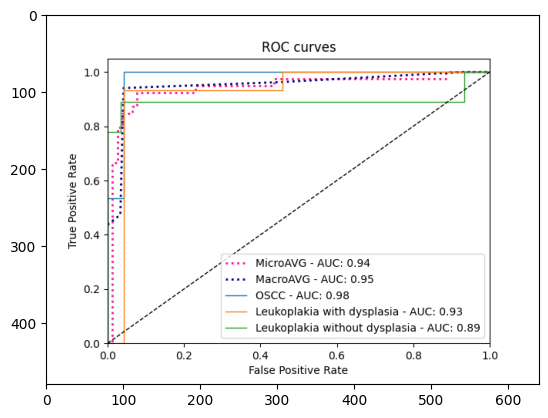

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

lb = LabelBinarizer()
lb.fit(val_labels)

train_labels_onehot = lb.transform(val_labels)
train_predicted_onehot = torch.tensor(val_prob)

roc_auc, fpr, tpr = auc_and_roc_curve(train_labels_onehot, train_predicted_onehot, class_names, save_path="/content/drive/MyDrive/my_models/classify_mobileNetv3_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up_Train_AUC.png")

print(f"Train AUC for Each Class: {roc_auc}")

avg_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Average AUC: {avg_auc}")
print(f"Macro-average AUC: {roc_auc['macro']}")

img = mpimg.imread('/content/drive/MyDrive/my_models/classify_mobileNetv3_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up_Train_AUC.png')

# Display the image
imgplot = plt.imshow(img)
plt.show()



#### Test Phase Result ####
Test Balanced Accuracy: 0.8444444444444444
Test Accuracy: 0.8717948717948718
Test Precision: 0.8735186382245206
Test Recall: 0.8717948717948718
Test Specificity: 0.9333333333333335
Test F1 Score: 0.8685897435897436
Confusion Matrix:


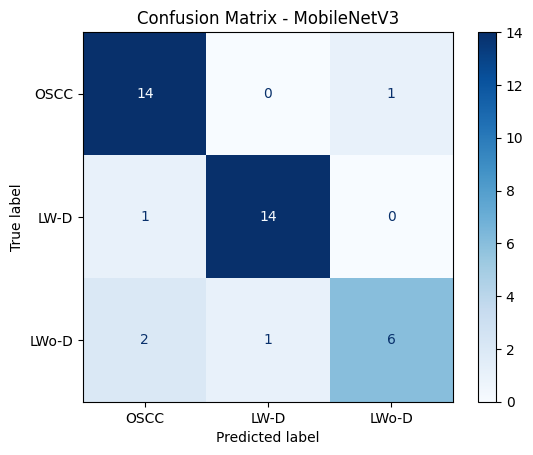

In [37]:
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import torch.nn.functional as F
import torch

num_classes = 3

# Load the saved model
classifying_model = JointFusionModel_MobileNetV3_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=23)
classifying_model.load_state_dict(torch.load("/content/drive/MyDrive/my_models/classify_mobileNetv3_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt"))

# Define a DataLoader for the test data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Initialize lists to store test metrics
test_labels = []
test_predicted = []
test_prob = []

classifying_model.eval()

with torch.no_grad():
    for inputs, csv_features, labels in testloader:
        # Extract features using the SimSiam model
        csv_features = csv_features.to(inputs.device)
        # Forward pass through the classifier model
        outputs = classifying_model(inputs, csv_features)
        tprob = F.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        # Store metrics
        test_labels.extend(labels.tolist())
        test_predicted.extend(preds.tolist())
        test_prob.extend(tprob.tolist())
# Calculate metrics for the test data
test_accuracy = accuracy_score(test_labels, test_predicted)
test_precision = precision_score(test_labels, test_predicted, average='weighted')
test_recall = recall_score(test_labels, test_predicted, average='weighted')
test_f1 = f1_score(test_labels, test_predicted, average='weighted')

# Convert labels and predictions to binary format
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])
test_predicted_bin = label_binarize(test_predicted, classes=[0, 1, 2])

# Calculate AUC for each class
test_aucs = []
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_bin[:, i], test_predicted_bin[:, i])
    test_auc_score = auc(fpr, tpr)
    test_aucs.append(test_auc_score)

avg_test_auc=sum(test_aucs)/ num_classes

# Calculate and print the confusion matrix
confusion_matrix_result = confusion_matrix(test_labels, test_predicted)
test_specificity = specificity_score(test_labels, test_predicted, average='macro')
test_balanced_acc= recall_score(test_labels, test_predicted, average='macro')
class_names = ['OSCC', 'LW-D', 'LWo-D']
# Print the test metrics
print("\n\n#### Test Phase Result ####")
print(f"Test Balanced Accuracy: {test_balanced_acc}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test Specificity: {test_specificity}")
print(f"Test F1 Score: {test_f1}")
print("Confusion Matrix:")
#ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names).plot(cmap='Blues')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - MobileNetV3")
plt.savefig("confusion_matrix_MobileNetV3.png", dpi=600)
plt.show()


Test AUC Results:
OSCC: AUC = 0.972, SE = 0.0309, CI95 = (0.912, 1.000)
Leukoplakia with dysplasia: AUC = 0.936, SE = 0.0464, CI95 = (0.845, 1.000)
Leukoplakia without dysplasia: AUC = 0.893, SE = 0.0741, CI95 = (0.747, 1.000)
macro: AUC = 0.950, SE = 0.0251, CI95 = (0.901, 0.999)
micro: AUC = 0.946, SE = 0.0259, CI95 = (0.896, 0.997)
Macro-average AUC: 0.9502


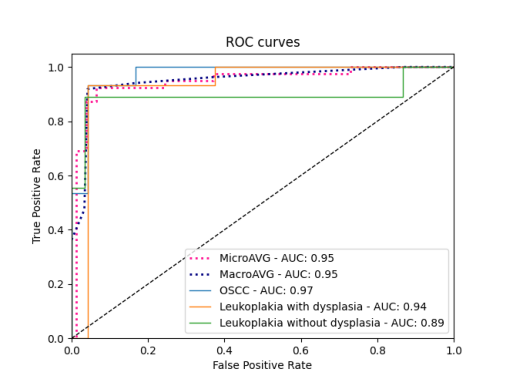

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

# Binarize labels
lb = LabelBinarizer()
lb.fit(test_labels)
test_labels_onehot = lb.transform(test_labels)

# Convert prediction to tensor if not already
test_predicted_onehot = torch.tensor(test_prob).numpy()

# Call the updated AUC function
roc_auc2, fpr, tpr, auc_stats = auc_and_roc_curve(
    test_labels_onehot, test_predicted_onehot,
    class_names, save_path="/content/drive/MyDrive/my_models/Final_mobilenetv3_HE_FL_Adam_5kf_10e_orig_img_with_MLP_CSV_MetaBlock_JointFusion_up_Test_AUC_CI_SE.png"
)

# Print results with SE and 95% CI
print("Test AUC Results:")
for cls in class_names + ['macro', 'micro']:
    if cls in auc_stats:
        stat = auc_stats[cls]
        print(f"{cls}: AUC = {stat['auc']:.3f}, SE = {stat['se']:.4f}, CI95 = ({stat['ci_95'][0]:.3f}, {stat['ci_95'][1]:.3f})")

# Average of class-specific AUCs only (not including micro/macro)
class_avg_auc = sum([auc_stats[c]['auc'] for c in class_names]) / len(class_names)

print(f"Macro-average AUC: {auc_stats['macro']['auc']:.4f}")

# Display the saved ROC image
img = mpimg.imread('/content/drive/MyDrive/my_models/Final_mobilenetv3_HE_FL_Adam_5kf_10e_orig_img_with_MLP_CSV_MetaBlock_JointFusion_up_Test_AUC_CI_SE.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
np.bool = np.bool_
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import nn
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

# Hyperparameters
num_epochs = 15
num_folds = 5
learning_rate = 0.001
num_classes = 3
hard_example_ratio = 0.2  # The percentage of hard examples to focus on
confidence_threshold = 0.6  # Confidence threshold for constructive learning
# Initialize the FocalLoss
gamma = 1.5 # focusing parameter (higher value focuses more on hard examples)
alpha = torch.tensor([0.25, 0.25, 0.50])
criterion = FocalLoss(gamma=gamma, alpha=alpha)
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
classification_reports = []
confusion_matrices = []
balanced_accuracy_list = []
specificity_list = []

# Assuming trainset and trainloader are defined
for fold, (train_idx, val_idx) in enumerate(skf.split(trainset, trainset.targets)):
    print(f"Fold {fold + 1}/{num_folds}")

    # Create DataLoaders for train and validation sets
    val_sampler = SubsetRandomSampler(val_idx)
    valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler, num_workers=2)
    train_sampler = SubsetRandomSampler(train_idx)
    trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler, num_workers=2)

    # Define the model
    classifying_model = JointFusionModel_inception_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=1280)

    # Define loss function and optimizer
    #criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(classifying_model.parameters(), lr=learning_rate)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Training loop
    for epoch in range(num_epochs):
        classifying_model.train()
        running_loss = 0.0
        running_corrects = 0
        hard_examples = []

        for images, csv_features, labels in trainloader:
            csv_features = csv_features.to(images.device)
            optimizer.zero_grad()

            # Forward pass
            outputs = classifying_model(images, csv_features)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update running loss and correct predictions
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data)

            # Track hard examples (low-confidence corrects and incorrects)
            prob = torch.softmax(outputs, dim=1)
            confidence, _ = torch.max(prob, 1)
            hard_mask = (confidence < confidence_threshold)
            hard_examples.append((images[hard_mask], csv_features[hard_mask], labels[hard_mask]))

        # After each epoch, use hard examples for a few additional steps
        if hard_examples:
            hard_images, hard_csv, hard_labels = zip(*hard_examples)
            hard_images = torch.cat(hard_images)
            hard_csv = torch.cat(hard_csv)
            hard_labels = torch.cat(hard_labels)

            for i in range(int(hard_example_ratio * len(trainloader))):
                optimizer.zero_grad()
                hard_outputs = classifying_model(hard_images, hard_csv)
                hard_loss = criterion(hard_outputs, hard_labels)
                hard_loss.backward()
                optimizer.step()

        # Calculate loss and accuracy for the epoch
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = running_corrects.double() / len(trainloader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_acc}")

    # Validation loop
    with torch.no_grad():
        classifying_model.eval()
        val_labels = []
        val_predicted = []
        val_prob = []

        for images, csv_features, labels in valloader:
            csv_features = csv_features.to(images.device)
            outputs = classifying_model(images, csv_features)
            prob = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            val_labels.extend(labels.tolist())
            val_predicted.extend(preds.tolist())
            val_prob.extend(prob.tolist())

        val_prob2 = np.array(outputs)
        # Metrics calculation
        accuracy = accuracy_score(val_labels, val_predicted)
        precision = precision_score(val_labels, val_predicted, average='weighted')
        recall = recall_score(val_labels, val_predicted, average='weighted')
        f1 = f1_score(val_labels, val_predicted, average='weighted', zero_division=0)
        balanced_acc = recall_score(val_labels, val_predicted, average='macro')
        specificity = precision_score(val_labels, val_predicted, average='macro', zero_division=0)

        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        balanced_accuracy_list.append(balanced_acc)
        specificity_list.append(specificity)

        class_report = classification_report(val_labels, val_predicted, target_names=[str(i) for i in range(num_classes)])
        classification_reports.append(class_report)
        conf_matrix = confusion_matrix(val_labels, val_predicted)
        confusion_matrices.append(conf_matrix)

        val_labels_bin = label_binarize(val_labels, classes=[0, 1, 2])
        predicted_bin = label_binarize(val_predicted, classes=[0, 1, 2])
        aucs = []
        for i in range(num_classes):
            fpr, tpr, _ = roc_curve(val_labels_bin[:, i], predicted_bin[:, i])
            auc_score = auc(fpr, tpr)
            aucs.append(auc_score)

        auc_list.append(aucs)

# Compute and display average metrics
avg_accuracy = sum(accuracy_list) / num_folds
avg_precision = sum(precision_list) / num_folds
avg_recall = sum(recall_list) / num_folds
avg_f1 = sum(f1_list) / num_folds
avg_aucs = np.mean(auc_list, axis=0)
avg_auc_all_classes = sum(avg_aucs) / num_classes
avg_balanced_acc = sum(balanced_accuracy_list) / num_folds
avg_specificity = sum(specificity_list) / num_folds
avg_conf = sum(confusion_matrices)

print(f"\n\n#### Train Phase Results ####")
print(f"Train Balanced Accuracy: {avg_balanced_acc}")
print(f"Train Accuracy: {avg_accuracy}")
print(f"Train Precision: {avg_precision}")
print(f"Train Recall: {avg_recall}")
print(f"Train Specificity: {avg_specificity}")
print(f"Train F1 Score: {avg_f1}")
print(f"Train AUC for Each Class: {avg_aucs}\nTrain AUC: {avg_auc_all_classes}\n ")
print("Train Confusion Matrix:\n")
ConfusionMatrixDisplay(avg_conf).plot()

In [ ]:
# Save the final model after training all folds
final_model_save_path = "/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt"
torch.save(classifying_model.state_dict(), final_model_save_path)
print(f"Final model saved to {final_model_save_path}")

Final model saved to /content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt


Train AUC for Each Class: {'OSCC': 0.9805555555555556, 'Leukoplakia with dysplasia': 0.9305555555555556, 'Leukoplakia without dysplasia': 0.9518518518518518, 'macro': 0.9695679012345679, 'micro': 0.957922419460881}
Average AUC: 0.9580906567316824
Macro-average AUC: 0.9695679012345679


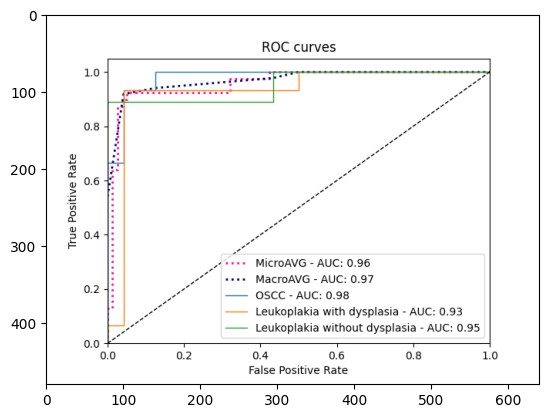

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

lb = LabelBinarizer()
lb.fit(val_labels)

train_labels_onehot = lb.transform(val_labels)
train_predicted_onehot = torch.tensor(val_prob)

roc_auc, fpr, tpr = auc_and_roc_curve(train_labels_onehot, train_predicted_onehot, class_names, save_path="/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up_Train_AUC.png")

print(f"Train AUC for Each Class: {roc_auc}")

avg_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Average AUC: {avg_auc}")
print(f"Macro-average AUC: {roc_auc['macro']}")

img = mpimg.imread('/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up_Train_AUC.png')

# Display the image
imgplot = plt.imshow(img)
plt.show()



#### Test Phase Result ####
Test Balanced Accuracy: 0.8592592592592593
Test Accuracy: 0.8717948717948718
Test Precision: 0.8758080155138979
Test Recall: 0.8717948717948718
Test Specificity: 0.9333333333333335
Test F1 Score: 0.8714112966141365
Confusion Matrix:


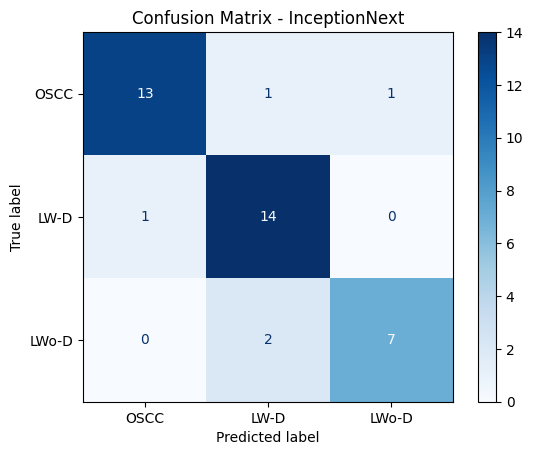

In [51]:
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import torch.nn.functional as F
import torch


num_classes = 3

# Load the saved model
classifying_model = JointFusionModel_inception_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=23)
classifying_model.load_state_dict(torch.load("/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt"))

# Define a DataLoader for the test data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Initialize lists to store test metrics
test_labels = []
test_predicted = []
test_prob = []

classifying_model.eval()

with torch.no_grad():
    for inputs, csv_features, labels in testloader:
        # Extract features using the SimSiam model
        csv_features = csv_features.to(inputs.device)
        # Forward pass through the classifier model
        outputs = classifying_model(inputs, csv_features)
        tprob = F.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        # Store metrics
        test_labels.extend(labels.tolist())
        test_predicted.extend(preds.tolist())
        test_prob.extend(tprob.tolist())
# Calculate metrics for the test data
test_accuracy = accuracy_score(test_labels, test_predicted)
test_precision = precision_score(test_labels, test_predicted, average='weighted')
test_recall = recall_score(test_labels, test_predicted, average='weighted')
test_f1 = f1_score(test_labels, test_predicted, average='weighted')

# Convert labels and predictions to binary format
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])
test_predicted_bin = label_binarize(test_predicted, classes=[0, 1, 2])

# Calculate AUC for each class
test_aucs = []
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_bin[:, i], test_predicted_bin[:, i])
    test_auc_score = auc(fpr, tpr)
    test_aucs.append(test_auc_score)

avg_test_auc=sum(test_aucs)/ num_classes

# Calculate and print the confusion matrix
confusion_matrix_result = confusion_matrix(test_labels, test_predicted)
test_specificity = specificity_score(test_labels, test_predicted, average='macro')
test_balanced_acc= recall_score(test_labels, test_predicted, average='macro')
class_names = ['OSCC', 'LW-D', 'LWo-D']
# Print the test metrics
print("\n\n#### Test Phase Result ####")
print(f"Test Balanced Accuracy: {test_balanced_acc}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test Specificity: {test_specificity}")
print(f"Test F1 Score: {test_f1}")
print("Confusion Matrix:")
#ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names).plot(cmap='Blues')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - InceptionNext")
plt.savefig("confusion_matrix_InceptionNext.png", dpi=600)
plt.show()


Test AUC Results:
OSCC: AUC = 0.972, SE = 0.0309, CI95 = (0.912, 1.000)
Leukoplakia with dysplasia: AUC = 0.942, SE = 0.0444, CI95 = (0.855, 1.000)
Leukoplakia without dysplasia: AUC = 0.930, SE = 0.0613, CI95 = (0.810, 1.000)
macro: AUC = 0.957, SE = 0.0232, CI95 = (0.912, 1.000)
micro: AUC = 0.953, SE = 0.0243, CI95 = (0.906, 1.000)
Macro-average AUC: 0.9574


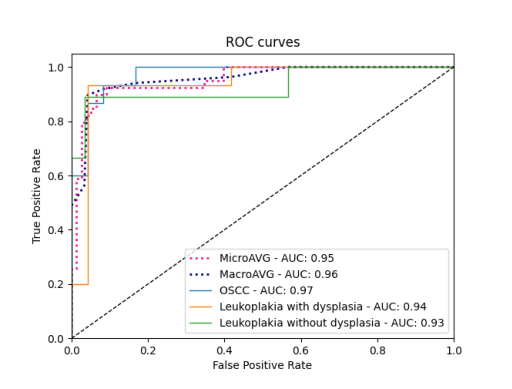

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

# Binarize labels
lb = LabelBinarizer()
lb.fit(test_labels)
test_labels_onehot = lb.transform(test_labels)

# Convert prediction to tensor if not already
test_predicted_onehot = torch.tensor(test_prob).numpy()

# Call the updated AUC function
roc_auc2, fpr, tpr, auc_stats = auc_and_roc_curve(
    test_labels_onehot, test_predicted_onehot,
    class_names, save_path="/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up_Test_AUC.png"
)

# Print results with SE and 95% CI
print("Test AUC Results:")
for cls in class_names + ['macro', 'micro']:
    if cls in auc_stats:
        stat = auc_stats[cls]
        print(f"{cls}: AUC = {stat['auc']:.3f}, SE = {stat['se']:.4f}, CI95 = ({stat['ci_95'][0]:.3f}, {stat['ci_95'][1]:.3f})")

# Average of class-specific AUCs only (not including micro/macro)
class_avg_auc = sum([auc_stats[c]['auc'] for c in class_names]) / len(class_names)

print(f"Macro-average AUC: {auc_stats['macro']['auc']:.4f}")

# Display the saved ROC image
img = mpimg.imread('/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up_Test_AUC.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
np.bool = np.bool_
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import nn
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

# Hyperparameters
num_epochs = 15
num_folds = 5
learning_rate = 0.001
num_classes = 3
hard_example_ratio = 0.2  # The percentage of hard examples to focus on
confidence_threshold = 0.6  # Confidence threshold for constructive learning
# Initialize the FocalLoss
gamma = 1.5 # focusing parameter (higher value focuses more on hard examples)
#alpha = torch.tensor([0.25, 0.25, 0.50])  # example for 3-class problem
alpha = torch.tensor([0.25, 0.25, 0.50])
criterion = FocalLoss(gamma=gamma, alpha=alpha)
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
classification_reports = []
confusion_matrices = []
balanced_accuracy_list = []
specificity_list = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainset, trainset.targets)):
    print(f"Fold {fold + 1}/{num_folds}")

    # Create DataLoaders for train and validation sets
    val_sampler = SubsetRandomSampler(val_idx)
    valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler, num_workers=2)
    train_sampler = SubsetRandomSampler(train_idx)
    trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler, num_workers=2)

    # Define the model
    classifying_model = JointFusionModel_CaiT_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=1280)

    # Define loss function and optimizer
    #criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(classifying_model.parameters(), lr=learning_rate)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Training loop
    for epoch in range(num_epochs):
        classifying_model.train()
        running_loss = 0.0
        running_corrects = 0
        hard_examples = []

        for images, csv_features, labels in trainloader:
            csv_features = csv_features.to(images.device)
            optimizer.zero_grad()

            # Forward pass
            outputs = classifying_model(images, csv_features)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update running loss and correct predictions
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data)

            # Track hard examples (low-confidence corrects and incorrects)
            prob = torch.softmax(outputs, dim=1)
            confidence, _ = torch.max(prob, 1)
            hard_mask = (confidence < confidence_threshold)
            hard_examples.append((images[hard_mask], csv_features[hard_mask], labels[hard_mask]))

        # After each epoch, use hard examples for a few additional steps
        if hard_examples:
            hard_images, hard_csv, hard_labels = zip(*hard_examples)
            hard_images = torch.cat(hard_images)
            hard_csv = torch.cat(hard_csv)
            hard_labels = torch.cat(hard_labels)

            for i in range(int(hard_example_ratio * len(trainloader))):
                optimizer.zero_grad()
                hard_outputs = classifying_model(hard_images, hard_csv)
                hard_loss = criterion(hard_outputs, hard_labels)
                hard_loss.backward()
                optimizer.step()

        # Calculate loss and accuracy for the epoch
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = running_corrects.double() / len(trainloader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_acc}")

    # Validation loop
    with torch.no_grad():
        classifying_model.eval()
        val_labels = []
        val_predicted = []
        val_prob = []

        for images, csv_features, labels in valloader:
            csv_features = csv_features.to(images.device)
            outputs = classifying_model(images, csv_features)
            prob = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            val_labels.extend(labels.tolist())
            val_predicted.extend(preds.tolist())
            val_prob.extend(prob.tolist())

        val_prob2 = np.array(outputs)
        # Metrics calculation
        accuracy = accuracy_score(val_labels, val_predicted)
        precision = precision_score(val_labels, val_predicted, average='weighted')
        recall = recall_score(val_labels, val_predicted, average='weighted')
        f1 = f1_score(val_labels, val_predicted, average='weighted', zero_division=0)
        balanced_acc = recall_score(val_labels, val_predicted, average='macro')
        specificity = precision_score(val_labels, val_predicted, average='macro', zero_division=0)

        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        balanced_accuracy_list.append(balanced_acc)
        specificity_list.append(specificity)

        class_report = classification_report(val_labels, val_predicted, target_names=[str(i) for i in range(num_classes)])
        classification_reports.append(class_report)
        conf_matrix = confusion_matrix(val_labels, val_predicted)
        confusion_matrices.append(conf_matrix)

        val_labels_bin = label_binarize(val_labels, classes=[0, 1, 2])
        predicted_bin = label_binarize(val_predicted, classes=[0, 1, 2])
        aucs = []
        for i in range(num_classes):
            fpr, tpr, _ = roc_curve(val_labels_bin[:, i], predicted_bin[:, i])
            auc_score = auc(fpr, tpr)
            aucs.append(auc_score)

        auc_list.append(aucs)

# Compute and display average metrics
avg_accuracy = sum(accuracy_list) / num_folds
avg_precision = sum(precision_list) / num_folds
avg_recall = sum(recall_list) / num_folds
avg_f1 = sum(f1_list) / num_folds
avg_aucs = np.mean(auc_list, axis=0)
avg_auc_all_classes = sum(avg_aucs) / num_classes
avg_balanced_acc = sum(balanced_accuracy_list) / num_folds
avg_specificity = sum(specificity_list) / num_folds
avg_conf = sum(confusion_matrices)

print(f"\n\n#### Train Phase Results ####")
print(f"Train Balanced Accuracy: {avg_balanced_acc}")
print(f"Train Accuracy: {avg_accuracy}")
print(f"Train Precision: {avg_precision}")
print(f"Train Recall: {avg_recall}")
print(f"Train Specificity: {avg_specificity}")
print(f"Train F1 Score: {avg_f1}")
print(f"Train AUC for Each Class: {avg_aucs}\nTrain AUC: {avg_auc_all_classes}\n ")
print("Train Confusion Matrix:\n")
ConfusionMatrixDisplay(avg_conf).plot()

In [ ]:
# Save the final model after training all folds
final_model_save_path = "/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up.pt"
torch.save(classifying_model.state_dict(), final_model_save_path)
print(f"Final model saved to {final_model_save_path}")

Final model saved to /content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up.pt


Train AUC for Each Class: {'OSCC': 0.9833333333333334, 'Leukoplakia with dysplasia': 0.9388888888888889, 'Leukoplakia without dysplasia': 0.9444444444444444, 'macro': 0.966820987654321, 'micro': 0.9589086127547666}
Average AUC: 0.9584792534151507
Macro-average AUC: 0.966820987654321


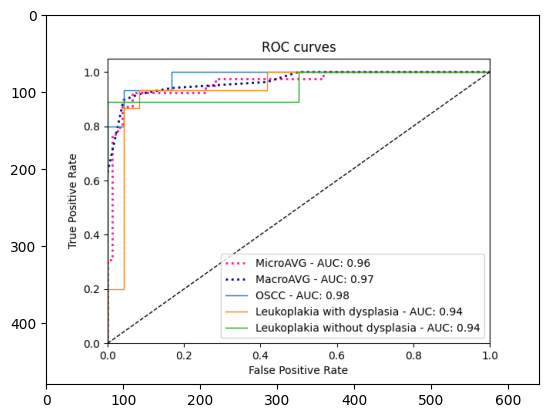

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

lb = LabelBinarizer()
lb.fit(val_labels)

train_labels_onehot = lb.transform(val_labels)
train_predicted_onehot = torch.tensor(val_prob)

roc_auc, fpr, tpr = auc_and_roc_curve(train_labels_onehot, train_predicted_onehot, class_names, save_path="/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up_Train_AUC.png")

print(f"Train AUC for Each Class: {roc_auc}")

avg_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Average AUC: {avg_auc}")
print(f"Macro-average AUC: {roc_auc['macro']}")

img = mpimg.imread('/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up_Train_AUC.png')

# Display the image
imgplot = plt.imshow(img)
plt.show()



#### Test Phase Result ####
Test Balanced Accuracy: 0.8740740740740741
Test Accuracy: 0.8717948717948718
Test Precision: 0.8761834319526628
Test Recall: 0.8717948717948718
Test Specificity: 0.9361111111111112
Test F1 Score: 0.8713968544189257
Confusion Matrix:


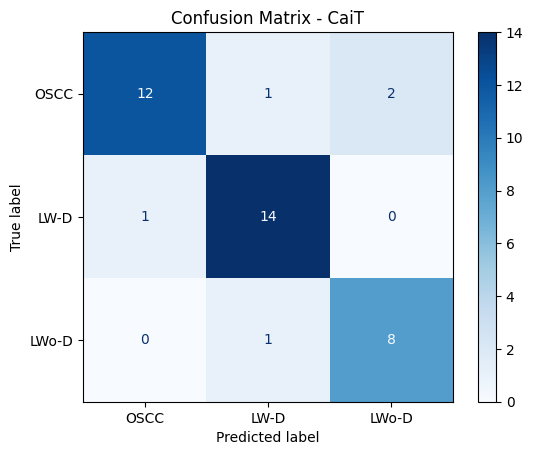

In [44]:
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import torch.nn.functional as F
import torch

num_classes = 3

# Load the saved model
classifying_model = JointFusionModel_CaiT_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=23)
classifying_model.load_state_dict(torch.load("/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up.pt"))

# Define a DataLoader for the test data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Initialize lists to store test metrics
test_labels = []
test_predicted = []
test_prob = []

classifying_model.eval()
with torch.no_grad():
    for inputs, csv_features, labels in testloader:
        csv_features = csv_features.to(inputs.device)
        outputs = classifying_model(inputs, csv_features)
        tprob = F.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        # Store metrics
        test_labels.extend(labels.tolist())
        test_predicted.extend(preds.tolist())
        test_prob.extend(tprob.tolist())
# Calculate metrics for the test data
test_accuracy = accuracy_score(test_labels, test_predicted)
test_precision = precision_score(test_labels, test_predicted, average='weighted')
test_recall = recall_score(test_labels, test_predicted, average='weighted')
test_f1 = f1_score(test_labels, test_predicted, average='weighted')

# Convert labels and predictions to binary format
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])
test_predicted_bin = label_binarize(test_predicted, classes=[0, 1, 2])

# Calculate AUC for each class
test_aucs = []
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_bin[:, i], test_predicted_bin[:, i])
    test_auc_score = auc(fpr, tpr)
    test_aucs.append(test_auc_score)

avg_test_auc=sum(test_aucs)/ num_classes

# Calculate and print the confusion matrix
confusion_matrix_result = confusion_matrix(test_labels, test_predicted)
test_specificity = specificity_score(test_labels, test_predicted, average='macro')
test_balanced_acc= recall_score(test_labels, test_predicted, average='macro')
class_names = ['OSCC', 'LW-D', 'LWo-D']
# Print the test metrics
print("\n\n#### Test Phase Result ####")
print(f"Test Balanced Accuracy: {test_balanced_acc}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test Specificity: {test_specificity}")
print(f"Test F1 Score: {test_f1}")
print("Confusion Matrix:")
#ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names).plot(cmap='Blues')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CaiT")
plt.savefig("confusion_matrix_CaiT.png", dpi=600)
plt.show()

Test AUC Results:
OSCC: AUC = 0.967, SE = 0.0338, CI95 = (0.900, 1.000)
Leukoplakia with dysplasia: AUC = 0.931, SE = 0.0483, CI95 = (0.836, 1.000)
Leukoplakia without dysplasia: AUC = 0.911, SE = 0.0681, CI95 = (0.778, 1.000)
macro: AUC = 0.954, SE = 0.0242, CI95 = (0.906, 1.000)
micro: AUC = 0.954, SE = 0.0241, CI95 = (0.907, 1.000)
Macro-average AUC: 0.9536


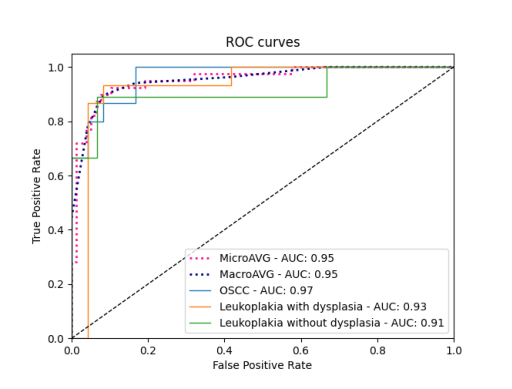

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

# Binarize labels
lb = LabelBinarizer()
lb.fit(test_labels)
test_labels_onehot = lb.transform(test_labels)

# Convert prediction to tensor if not already
test_predicted_onehot = torch.tensor(test_prob).numpy()

# Call the updated AUC function
roc_auc2, fpr, tpr, auc_stats = auc_and_roc_curve(
    test_labels_onehot, test_predicted_onehot,
    class_names, save_path="/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up_Test_AUC.png"
)

# Print results with SE and 95% CI
print("Test AUC Results:")
for cls in class_names + ['macro', 'micro']:
    if cls in auc_stats:
        stat = auc_stats[cls]
        print(f"{cls}: AUC = {stat['auc']:.3f}, SE = {stat['se']:.4f}, CI95 = ({stat['ci_95'][0]:.3f}, {stat['ci_95'][1]:.3f})")

# Average of class-specific AUCs only (not including micro/macro)
class_avg_auc = sum([auc_stats[c]['auc'] for c in class_names]) / len(class_names)

print(f"Macro-average AUC: {auc_stats['macro']['auc']:.4f}")

# Display the saved ROC image
img = mpimg.imread('/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up_Test_AUC.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Ensemble weighted average

In [40]:
InceptionNext = JointFusionModel_inception_MLPforcsv2_metaBlock_up(num_classes = 3, img_feature_dim = 2560, csv_input_dim = 1280)
InceptionNext.load_state_dict(torch.load('/content/drive/MyDrive/my_models/classify_inception_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt'))


<All keys matched successfully>

In [41]:
CaiT = JointFusionModel_CaiT_MLPforcsv2_metaBlock_up(num_classes = 3, img_feature_dim = 2560, csv_input_dim = 23)
CaiT.load_state_dict(torch.load('/content/drive/MyDrive/my_models/classify_CaiT_hardexp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_leakyRelu_CSV_MetaBlock22_JointFusion_up.pt'))


<All keys matched successfully>

In [42]:
MobileNetV3 = JointFusionModel_MobileNetV3_MLPforcsv2_metaBlock_up(num_classes=3, img_feature_dim=2560, csv_input_dim=23)
MobileNetV3.load_state_dict(torch.load("/content/drive/MyDrive/my_models/classify_mobileNetv3_hardestExp_focaloss_252550_Adam_5kf_15e_orig_img_with_MLP4_CSV_MetaBlock_JointFusion_up.pt"))


<All keys matched successfully>



#### Test Phase Result ####
Test Balanced Accuracy: 0.9185185185185185
Test Accuracy: 0.9230769230769231
Test Precision: 0.9262820512820513
Test Recall: 0.9230769230769231
Test Specificity: 0.9583333333333334
Test F1 Score: 0.9235634700530335
Confusion Matrix:


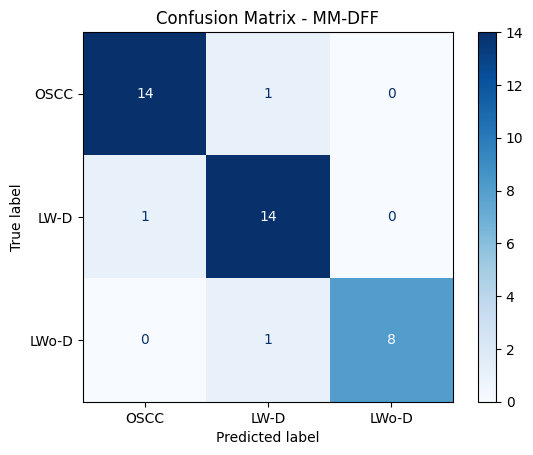

In [48]:
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import torch
import torch.nn.functional as F
import numpy as np
from torchvision import models
import random

def set_seeds(seed=999):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Initialize seeds
set_seeds()

# Load the saved models and weights
models_list = [CaiT,InceptionNext,MobileNetV3]

# Set weights for the ensemble
weights = np.array([0.5,0.25,0.25])
weights = weights / np.sum(weights)



# Define a DataLoader for the test data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Initialize lists to store test metrics
test_labels = []
test_predicted = []
test_prob = []

with torch.no_grad():
    for inputs, csv_features, labels in testloader:
        model_preds = []
         # Extract features using the SimSiam model
        csv_features = csv_features.to(inputs.device)
        # Forward pass through the classifier model
        for model in models_list:
            outputs = model(inputs,csv_features)
            prob = F.softmax(outputs, dim=1)
            model_preds.append(prob)

        # Combine model predictions using weighted average
        ensemble_prob = sum(weight * model_prob for weight, model_prob in zip(weights, model_preds))
        _, ensemble_preds = torch.max(ensemble_prob, 1)
        test_labels.extend(labels.tolist())
        test_predicted.extend(ensemble_preds.tolist())
        test_prob.extend(ensemble_prob.tolist())

# Calculate metrics for the test data
test_accuracy = accuracy_score(test_labels, test_predicted)
test_precision = precision_score(test_labels, test_predicted, average='weighted')
test_recall = recall_score(test_labels, test_predicted, average='weighted')
test_f1 = f1_score(test_labels, test_predicted, average='weighted')

# Convert labels and predictions to binary format
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])
test_predicted_bin = label_binarize(test_predicted, classes=[0, 1, 2])

# Calculate AUC for each class
test_aucs = []
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_bin[:, i], test_predicted_bin[:, i])
    test_auc_score = auc(fpr, tpr)
    test_aucs.append(test_auc_score)

avg_test_auc=sum(test_aucs)/ num_classes

# Calculate and print the confusion matrix
confusion_matrix_result = confusion_matrix(test_labels, test_predicted)
test_specificity = specificity_score(test_labels, test_predicted, average='macro')
test_balanced_acc= recall_score(test_labels, test_predicted, average='macro')
class_names = ['OSCC', 'LW-D', 'LWo-D']
# Print the test metrics
print("\n\n#### Test Phase Result ####")
print(f"Test Balanced Accuracy: {test_balanced_acc}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test Specificity: {test_specificity}")
print(f"Test F1 Score: {test_f1}")
print("Confusion Matrix:")
#ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names).plot(cmap='Blues')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - MM-DFF")
plt.savefig("confusion_matrix_MM-DFF.png", dpi=600)
plt.show()


Test AUC Results:
OSCC: AUC = 0.983, SE = 0.0240, CI95 = (0.936, 1.000)
Leukoplakia with dysplasia: AUC = 0.939, SE = 0.0454, CI95 = (0.850, 1.000)
Leukoplakia without dysplasia: AUC = 0.933, SE = 0.0598, CI95 = (0.816, 1.000)
macro: AUC = 0.965, SE = 0.0211, CI95 = (0.924, 1.000)
micro: AUC = 0.959, SE = 0.0228, CI95 = (0.914, 1.000)
Macro-average AUC: 0.9651


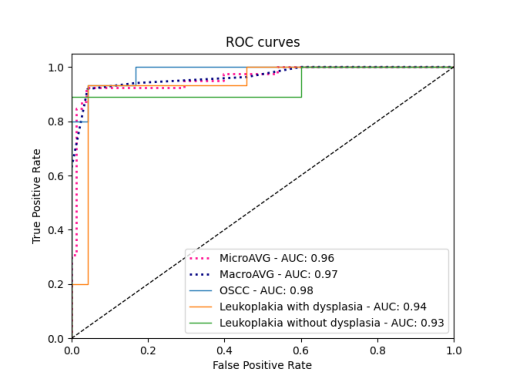

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

# Define your class names
class_names = ['OSCC', 'Leukoplakia with dysplasia', 'Leukoplakia without dysplasia']

# Binarize labels
lb = LabelBinarizer()
lb.fit(test_labels)
test_labels_onehot = lb.transform(test_labels)

# Convert prediction to tensor if not already
test_predicted_onehot = torch.tensor(test_prob).numpy()

# Call the updated AUC function
roc_auc2, fpr, tpr, auc_stats = auc_and_roc_curve(
    test_labels_onehot, test_predicted_onehot,
    class_names, save_path="/content/drive/MyDrive/my_models/Final_w_avg_mobilenetv3_and_inception_and_CaiT_HE_FL_Adam_5kf_10e_orig_img_with_MLP_CSV_MetaBlock_JointFusion_up_Test_AUC_CI_SE.png"
)

# Print results with SE and 95% CI
print("Test AUC Results:")
for cls in class_names + ['macro', 'micro']:
    if cls in auc_stats:
        stat = auc_stats[cls]
        print(f"{cls}: AUC = {stat['auc']:.3f}, SE = {stat['se']:.4f}, CI95 = ({stat['ci_95'][0]:.3f}, {stat['ci_95'][1]:.3f})")

# Average of class-specific AUCs only (not including micro/macro)
class_avg_auc = sum([auc_stats[c]['auc'] for c in class_names]) / len(class_names)
print(f"Macro-average AUC: {auc_stats['macro']['auc']:.4f}")
# Display the saved ROC image
img = mpimg.imread('/content/drive/MyDrive/my_models/Final_w_avg_mobilenetv3_and_inception_and_CaiT_HE_FL_Adam_5kf_10e_orig_img_with_MLP_CSV_MetaBlock_JointFusion_up_Test_AUC_CI_SE.png')
plt.imshow(img)
plt.axis('off')
plt.show()
